# Problem Statement

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 

In [383]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

# Read and Inspect Data

In [384]:
elearning=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\Documents\\upgrad\\23-lead-scoring-case-study\\Leads.csv')
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [385]:
elearning.shape

(9240, 37)

In [386]:
#Define function to get Meta-Data about any dataframe passed to the function
def get_data(dataframe) :
    data = pd.DataFrame({
            
                    'Total_Element': dataframe.count(), 
                    'Datatype' : dataframe.dtypes, 
                    'Null_Count': dataframe.isnull().sum(),
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100 
        
                       })
    return data

In [387]:
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.00
Lead Number,9240,int64,0,0.00
Lead Origin,9240,object,0,0.00
Lead Source,9204,object,36,0.39
Do Not Email,9240,object,0,0.00
Do Not Call,9240,object,0,0.00
Converted,9240,int64,0,0.00
TotalVisits,9103,float64,137,1.48
Total Time Spent on Website,9240,int64,0,0.00
Page Views Per Visit,9103,float64,137,1.48


In [388]:
#understanding categorical/numerical variables

features_list_1 =['Lead Origin', 'Lead Source', 'Last Activity', 'Country','City', 'Specialization',
                  'How did you hear about X Education', 'What is your current occupation', 
                  'What matters most to you in choosing a course']
for feature in features_list_1:
    print(feature,"\n",elearning[feature].value_counts(), end='\n\n')

Lead Origin 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source 
 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

Last Activity 
 Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428

In [389]:
#Found some categorical variables having only one or two values hence checking them
features_list_2=['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Magazine', 'Newspaper Article', 
                 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                 'Receive More Updates About Our Courses', 'Lead Quality','Update me on Supply Chain Content',
                 'Get updates on DM Content','Lead Profile']
for feature in features_list_2:
    print(feature,"\n",elearning[feature].value_counts(), end='\n\n')

Do Not Email 
 No     8506
Yes     734
Name: Do Not Email, dtype: int64

Do Not Call 
 No     9238
Yes       2
Name: Do Not Call, dtype: int64

Converted 
 0    5679
1    3561
Name: Converted, dtype: int64

Search 
 No     9226
Yes      14
Name: Search, dtype: int64

Magazine 
 No    9240
Name: Magazine, dtype: int64

Newspaper Article 
 No     9238
Yes       2
Name: Newspaper Article, dtype: int64

X Education Forums 
 No     9239
Yes       1
Name: X Education Forums, dtype: int64

Newspaper 
 No     9239
Yes       1
Name: Newspaper, dtype: int64

Digital Advertisement 
 No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Through Recommendations 
 No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Receive More Updates About Our Courses 
 No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Lead Quality 
 Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Na

In [390]:
len(features_list_1)

9

In [391]:
len(features_list_2)

15

In [392]:
elearning.shape

(9240, 37)

In [393]:
all_features=elearning.columns

In [394]:
remaining_features=all_features.difference(features_list_1).difference(features_list_2)
remaining_features

Index(['A free copy of Mastering The Interview', 'Asymmetrique Activity Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque', 'Last Notable Activity',
       'Lead Number', 'Page Views Per Visit', 'Prospect ID', 'Tags',
       'Total Time Spent on Website', 'TotalVisits'],
      dtype='object')

In [395]:
#Converting 'Select' to null values in  the following columns
#Lead Profile 
# How did you hear about X Education 
# Specialization
# City


elearning['Lead Profile']=elearning['Lead Profile'].replace('Select', np.nan)
elearning['How did you hear about X Education']=elearning['How did you hear about X Education'].replace('Select', np.nan)
elearning['Specialization']=elearning['Specialization'].replace('Select', np.nan)
elearning['City']=elearning['City'].replace('Select',np.nan)
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [396]:
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.00
Lead Number,9240,int64,0,0.00
Lead Origin,9240,object,0,0.00
Lead Source,9204,object,36,0.39
Do Not Email,9240,object,0,0.00
Do Not Call,9240,object,0,0.00
Converted,9240,int64,0,0.00
TotalVisits,9103,float64,137,1.48
Total Time Spent on Website,9240,int64,0,0.00
Page Views Per Visit,9103,float64,137,1.48


In [397]:
#Dropping the columns with greater than 40% null values

elearning= elearning.loc[:, (elearning.isin([' ','NULL']) | elearning.isnull()).mean() <= .40]
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.00
Lead Number,9240,int64,0,0.00
Lead Origin,9240,object,0,0.00
Lead Source,9204,object,36,0.39
Do Not Email,9240,object,0,0.00
Do Not Call,9240,object,0,0.00
Converted,9240,int64,0,0.00
TotalVisits,9103,float64,137,1.48
Total Time Spent on Website,9240,int64,0,0.00
Page Views Per Visit,9103,float64,137,1.48


In [398]:
elearning.shape
#7 columns have been dropped

(9240, 30)

In [399]:
#let's decide how to impute the null values in categorical columns

# 1. Lead Source

elearning['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [400]:
#Found one value with different case hence making them similar for calculation
elearning['Lead Source']=elearning['Lead Source'].replace('google','Google')
elearning['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [401]:
#Checking count of null values in Lead Source
elearning['Lead Source'].isnull().sum()

36

In [402]:
elearning['Lead Source'].mode()[0]

'Google'

In [403]:
#Replacing null values with mode Google as it is categorical column and combining some categories 
elearning['Lead Source']=elearning['Lead Source'].replace(to_replace=np.nan, value='Google')
elearning['Lead Source'].isnull().sum()

0

In [404]:
#As it can be seen that there are ome values in this column which have very low count hence 
#creating a new category as Others for them 
elearning['Lead Source']=elearning['Lead Source'].apply(lambda x: x if (x=='Google') | (x=='Direct Traffic') | 
                                                        (x=='Olark Chat') | (x=='Organic Search') else 'Others')
elearning['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             879
Name: Lead Source, dtype: int64

In [405]:
# 2. Imputing null values for TotalVisits with median as it is numerical variable
elearning['TotalVisits'].head()

0   0.00
1   5.00
2   2.00
3   1.00
4   2.00
Name: TotalVisits, dtype: float64

In [406]:
elearning['TotalVisits'].describe()

count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

In [407]:
elearning['TotalVisits'].median()

3.0

In [408]:
elearning['TotalVisits']=elearning['TotalVisits'].replace(np.nan,elearning['TotalVisits'].median())
elearning['TotalVisits'].isnull().sum()

0

In [409]:
# 3. Imputing Page Views Per Visit 
elearning['Page Views Per Visit']=elearning['Page Views Per Visit'].replace(np.nan,elearning['Page Views Per Visit'].median())
elearning['Page Views Per Visit'].isnull().sum()

0

In [410]:
elearning['Last Activity'].isnull().sum()

103

In [411]:
# 3. Imputing null values for Last Activity with mode as this is categorical variable
elearning['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [412]:
elearning['Last Activity'].mode()

0    Email Opened
dtype: object

In [413]:
elearning['Last Activity']=elearning['Last Activity'].replace(np.nan, 'Email Opened')
elearning['Last Activity'].isnull().sum()

0

In [414]:
# elearning['Last Activity']=elearning['Last Activity'].apply(lambda x: x if (x=='Email Opened') |
#                                                             (x=='SMS Sent') | 
#                                                         (x=='Olark Chat Conversation') | (x=='Page Visited on Website') 
#                                                             | (x=='Converted to Lead') | (x=='Email Bounced')
#                                                             | (x=='Email Link Clicked') | (x=='Form Submitted on Website')
#                                                             | (x=='Unreachable') | (x=='Unsubscribed') | (x=='Had a Phone Conversation')
#                                                             else 'Others')
elearning['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [415]:
# 4. Imputing null values for Country with mode as this is categorical variable
elearning['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
Netherlands                2
Ghana                      2
Bangladesh                 2
Uganda                     2
Belgium                    2
China                      2
Philippines                2
Italy                      2
Asia/Pacific Region        2
Indonesia                  1
Denmark                    1
Switzerland                1
Sri Lanka                  1
Kenya                      1
Malaysia                   1
Vietnam       

In [416]:
#Since the number of null value counts for country is very high for this column hence creating a different category for it
elearning['Country']=elearning['Country'].replace(np.nan,'Not Specified')
elearning['Country'].isnull().sum()

0

In [417]:
#The value India captures more than half of the value counts, other category values have a very low counts
#Hence making 2 values in this category as India and Others
#since there are large values where country is not specified hence putting those values in others category
elearning['Country']=elearning['Country'].apply(lambda x: x if x=='India' else 'Others')
elearning['Country'].value_counts()

India     6492
Others    2748
Name: Country, dtype: int64

In [418]:
# 5. Imptuing null values for Specialization with mode as this is categorical variable
elearning['Specialization'].isnull().sum()

3380

In [419]:
elearning['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [420]:
#On second thoughts since the count of null values is very high and if the null values are imputed 
#with mode then it will give highly skewed results so dropping the column
elearning=elearning.drop('Specialization',axis=1)
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [421]:
# 6. Imputing null values for What is your current occupation with mode since this is categorical variable

elearning['What is your current occupation'].isnull().sum()

2690

In [422]:
elearning['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [423]:
#since the null values are very high in count and replacing it with mode of the column would highly skew the data 
#hence creating a new category for the null values
#We are assuming that the people with null in current occupation are those people who do not wish to disclose their occupation 
#hence we are creating a new category
elearning['What is your current occupation']=elearning['What is your current occupation'].replace(np.nan,'Not Specified')
elearning['What is your current occupation'].isnull().sum()

0

In [424]:
# elearning['What is your current occupation']=elearning['What is your current occupation'].apply(
#     lambda x: x if (x=='Unemployed') | (x=='Working Professional') | (x=='Student') | (x=='Not Specified') else 'Others')
elearning['What is your current occupation'].value_counts()

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [425]:
# 7. Imputing null values for 'What matters most to you in choosing a course with' with mode as this is categorical variable 

elearning['What matters most to you in choosing a course'].isnull().sum()

2709

In [426]:
elearning['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [427]:
#This column has only one major value. It will not provide any insight into the model. Hence dropping it
elearning=elearning.drop('What matters most to you in choosing a course',axis=1)
elearning.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [428]:
# 8. Imputing null columns for column Tags with mode as this is categorical variable
elearning['Tags'].isnull().sum()

3353

In [429]:
elearning['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [430]:
#since null value count is greater than mode hence dropping the column
elearning=elearning.drop('Tags',axis=1)
elearning.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [431]:
# 9. Imputing null values for City with mode as this is categorical variable
elearning['City'].isnull().sum()

3669

In [432]:
elearning['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [433]:
#as null value counts is greater than mode hence dropping this column
#since this is online education hence City does not matter
elearning=elearning.drop('City',axis=1)
elearning.shape

(9240, 26)

In [434]:
#Checking the dataset now
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.00
Lead Number,9240,int64,0,0.00
Lead Origin,9240,object,0,0.00
Lead Source,9240,object,0,0.00
Do Not Email,9240,object,0,0.00
Do Not Call,9240,object,0,0.00
Converted,9240,int64,0,0.00
TotalVisits,9240,float64,0,0.00
Total Time Spent on Website,9240,int64,0,0.00
Page Views Per Visit,9240,float64,0,0.00


### Analysis: all the null values have been imputed

#### Moving towards numerical columns for outlier analysis

In [435]:
elearning.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00,9240.00
mean,617188.44,0.39,3.44,487.70,2.36
std,23406.00,0.49,4.82,548.02,2.15
min,579533.00,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,12.00,1.00
50%,615479.00,0.00,3.00,248.00,2.00
75%,637387.25,1.00,5.00,936.00,3.00
max,660737.00,1.00,251.00,2272.00,55.00


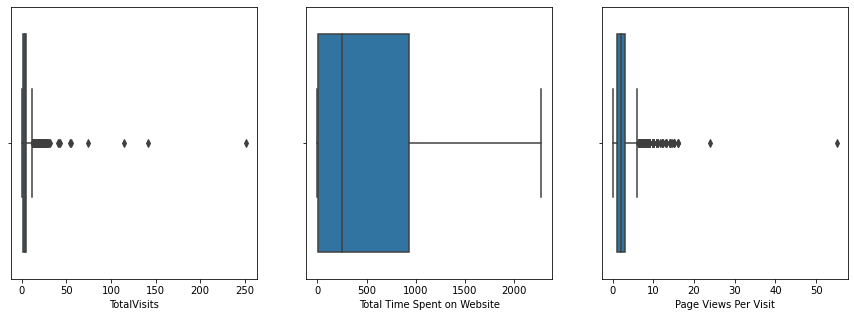

In [436]:
#subplot for numerical columns
attributes=['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
row = 1
col = 3
i = 0
plt.figure(figsize=[15,5])

for a in attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.boxplot(elearning[a])

plt.show()

#### Analysis: The max value for the three numerical columns are very high which might affect the model. Hence we need to cap those values.

In [437]:
elearning.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00,9240.00
mean,617188.44,0.39,3.44,487.70,2.36
std,23406.00,0.49,4.82,548.02,2.15
min,579533.00,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,12.00,1.00
50%,615479.00,0.00,3.00,248.00,2.00
75%,637387.25,1.00,5.00,936.00,3.00
90%,650506.10,1.00,7.00,1380.00,5.00
95%,655404.05,1.00,10.00,1562.00,6.00
99%,659592.98,1.00,17.00,1840.61,9.00


In [438]:
#Capping the values above 99 percentile with value for 99th percentile
for a in attributes:
    Q1 = elearning[a].quantile(0.99)
    elearning[a][elearning[a] > Q1] = Q1 

In [439]:
elearning.describe(percentiles=[.25,.5,.75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00,9240.00
mean,617188.44,0.39,3.33,486.51,2.33
std,23406.00,0.49,3.23,544.85,1.97
min,579533.00,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,12.00,1.00
50%,615479.00,0.00,3.00,248.00,2.00
75%,637387.25,1.00,5.00,936.00,3.00
99%,659592.98,1.00,17.00,1840.37,9.00
max,660737.00,1.00,17.00,1840.61,9.00


In [440]:
elearning.shape

(9240, 26)

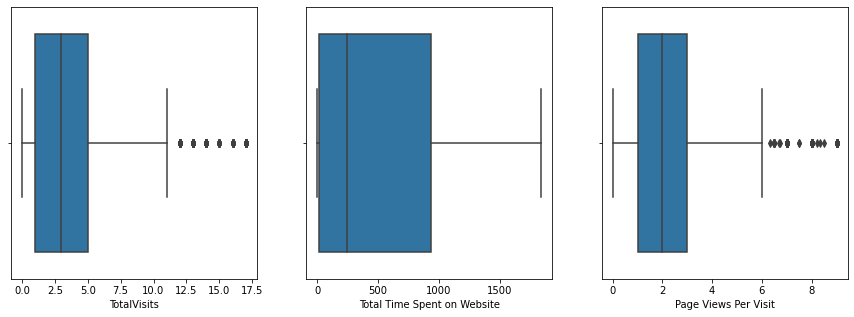

In [441]:
#lotting the boxplot to check for outliers again
row = 1
col = 3
i = 0
plt.figure(figsize=[15,5])

for a in attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.boxplot(elearning[a])

plt.show()

#### Analysis: The outliers have been capped and the graph is interpretable now.

In [442]:
# Determine the percentage of data retained

num_data = round(100*(len(elearning)/9240),2)
print(num_data)

100.0


#### Analysis: Until now no row has been dropped.

In [443]:
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0.00,0.00,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674.00,2.50,Email Opened,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532.00,2.00,Email Opened,India,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305.00,1.00,Unreachable,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428.00,1.00,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


# Univariate analysis

In [444]:
elearning.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

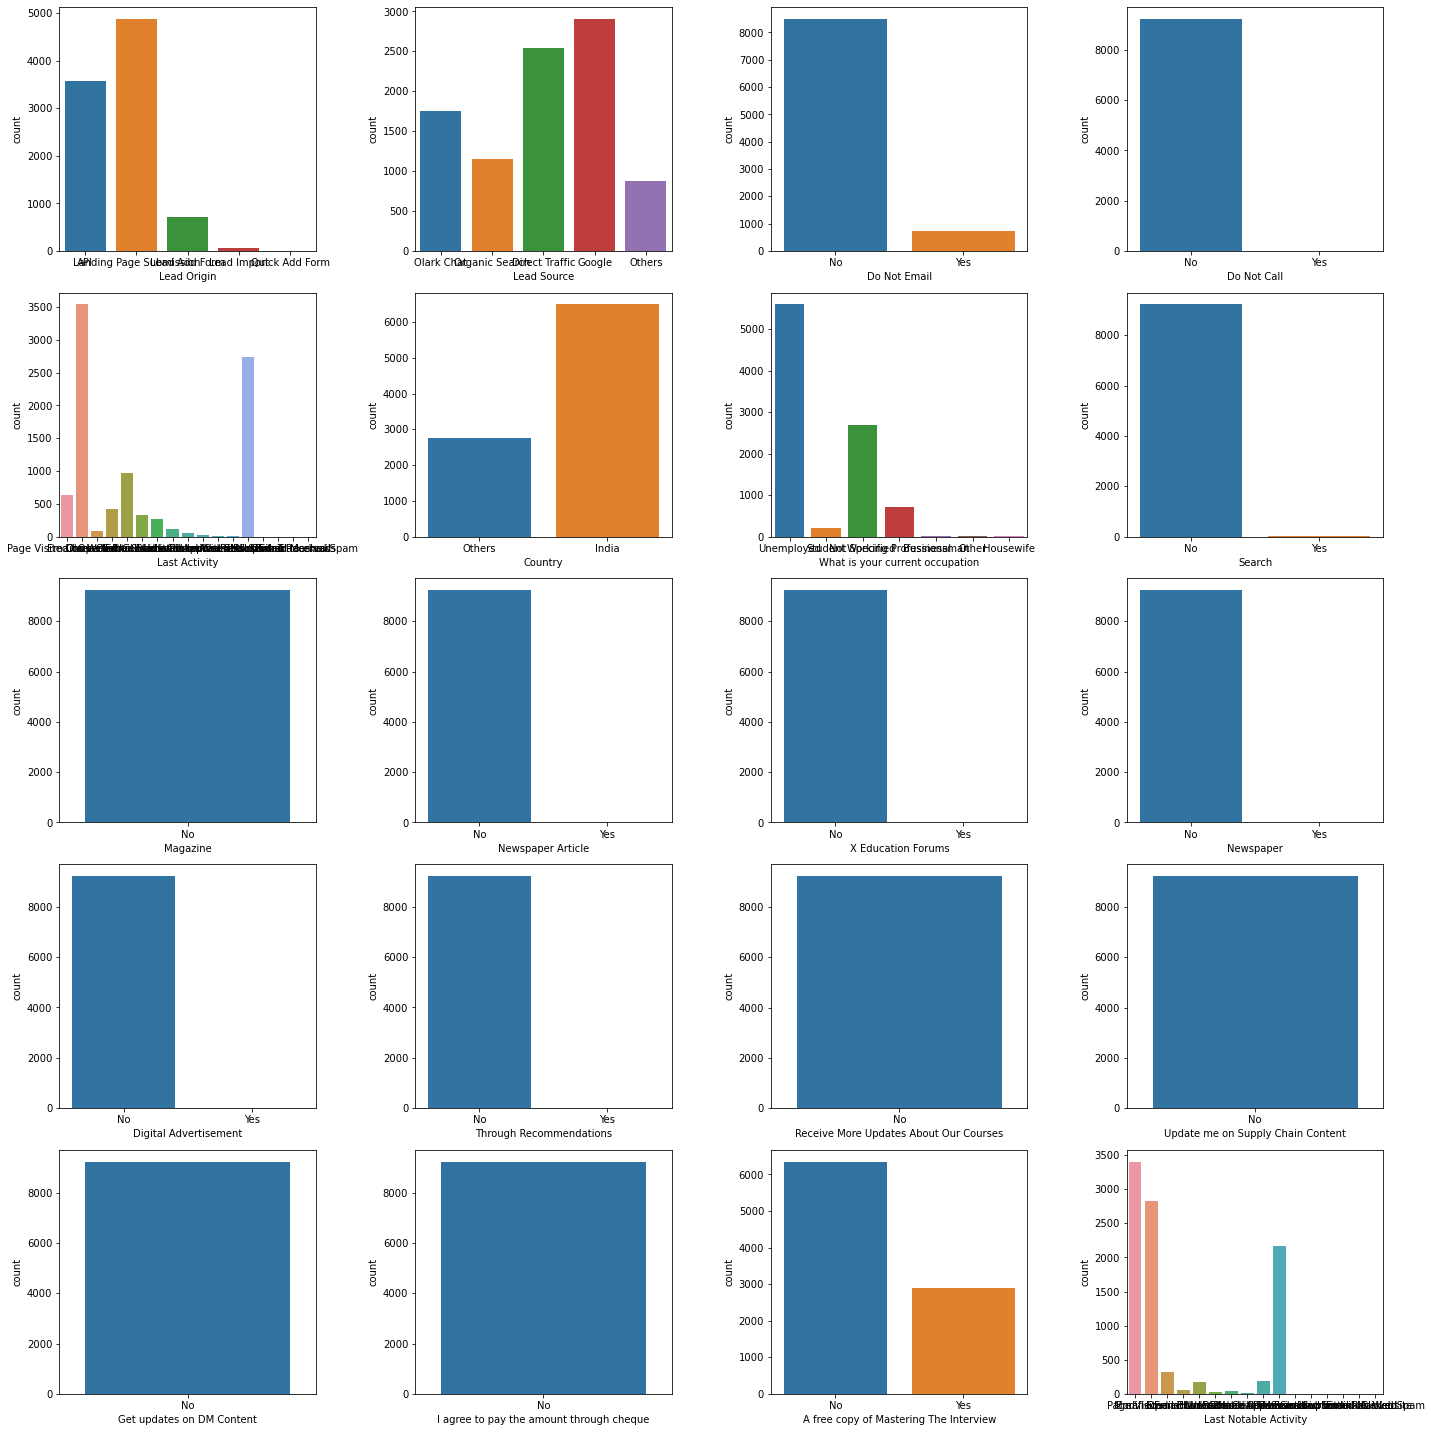

In [445]:
#Count plot for all categorical attributes
#Lead Origin
#Lead Source
#Do Not Email
#Do Not Call
#Last Activity
#Country
#What is your current occupation
#Search
#Magazine
#Newspaper Article
#X Education Forums
#Newspaper
#Digital Advertisement
#Through Recommendations
#Receive More Updates About Our Courses
#Update me on Supply Chain Content
#Get updates on DM Content
#I agree to pay the amount through cheque
#A free copy of Mastering The Interview
#Last Notable Activity

cat_attributes=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
               'Country', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums'
               ,'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 
               'A free copy of Mastering The Interview', 'Last Notable Activity']
row = 5
col = 4
i = 0
plt.figure(figsize=[20,20])

for a in cat_attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.countplot(elearning[a])

plt.tight_layout()

#### Analysis: Some columns have only one significant values. We need to drop them as they would not help in the analysis.

In [446]:
elearning['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [447]:
elearning['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [448]:
elearning['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [449]:
elearning['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [450]:
elearning['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [451]:
elearning['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [452]:
elearning['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [453]:
#dropping columns which have very skewed data
drop_attributes=['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                 'Through Recommendations','Magazine','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
elearning=elearning.drop(drop_attributes,axis=1)
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.00,0.00,0.00,Page Visited on Website,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.00,674.00,2.50,Email Opened,India,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.00,1532.00,2.00,Email Opened,India,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.00,305.00,1.00,Unreachable,India,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.00,1428.00,1.00,Converted to Lead,India,Unemployed,No,Modified


In [454]:
elearning.shape

(9240, 14)

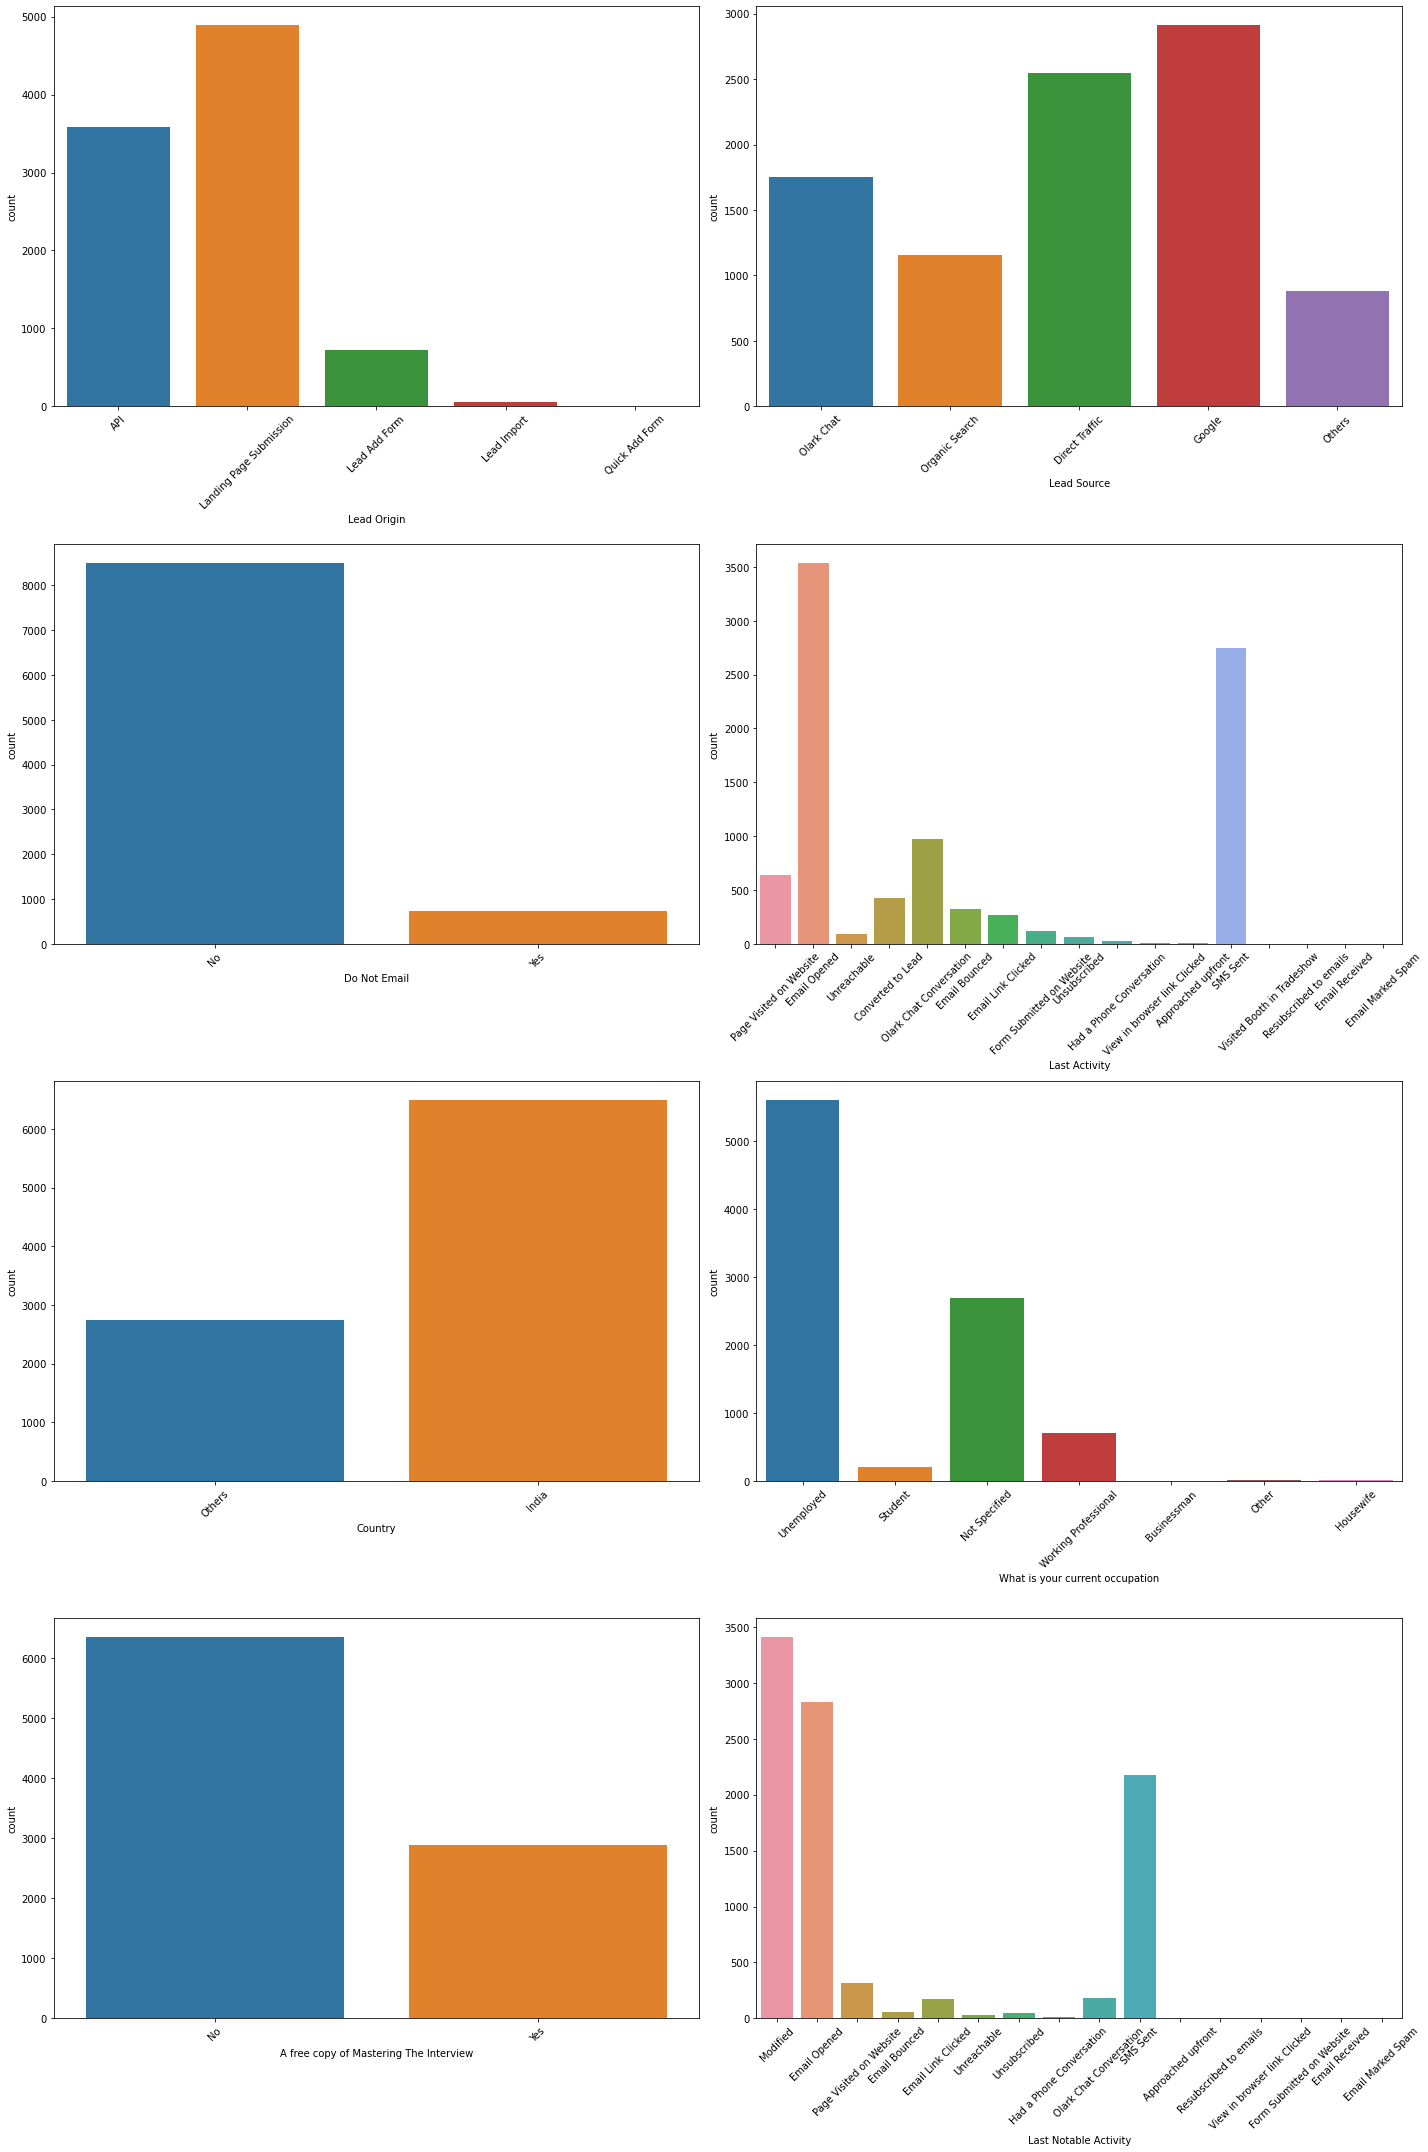

In [455]:
#plotting the graph again to check the ditribution now
cat_attributes=['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','What is your current occupation',
               'A free copy of Mastering The Interview','Last Notable Activity']

row = 4
col = 2
i = 0
plt.figure(figsize=[20,30])

for a in cat_attributes:
    i += 1
    plt.subplot(row,col,i)
    plt.xticks(rotation=45)
    sns.countplot(elearning[a])

plt.tight_layout()

# Bivariate analysis

In [456]:
#function for co-relation matrix

def corr_matrix(data,title):
    plt.figure(figsize=(10, 5))
    #Mask the upper side  
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    #Diagonal elements
    mask[np.diag_indices_from(mask)] = False
    
    sns.heatmap(data, cmap="YlGnBu",mask=mask,annot=True,linewidth=.3)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

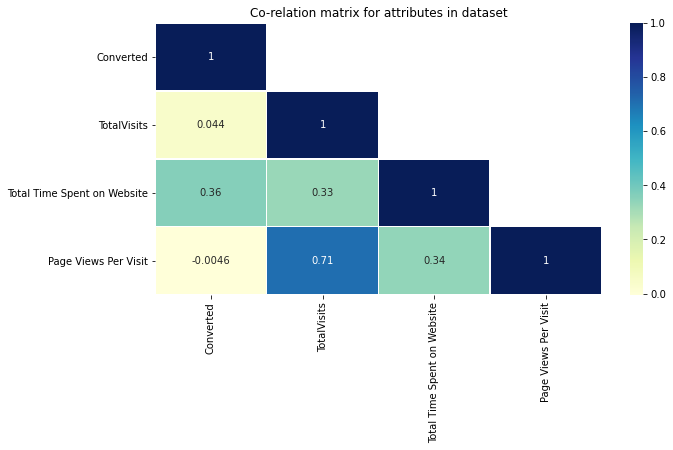

In [457]:
#Heatmap for checking co-linearty among the numerical attributes
elearning_bivariate_analysis=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

corr_matrix(data=elearning[elearning_bivariate_analysis].corr(),title='Co-relation matrix for attributes in dataset')

#### Analysis: Page Views Per visit and Total visits have co-relation else other values are not co-related. This implies that linear relation among attributes is not very high.

In [458]:
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.00,0.00,0.00,Page Visited on Website,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.00,674.00,2.50,Email Opened,India,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.00,1532.00,2.00,Email Opened,India,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.00,305.00,1.00,Unreachable,India,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.00,1428.00,1.00,Converted to Lead,India,Unemployed,No,Modified


In [460]:
#converting yes/no variable to 0/1
variablelist =   ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
elearning[variablelist] = elearning[variablelist].apply(binary_map)
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.00,0.00,0.00,Page Visited on Website,Others,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.00,674.00,2.50,Email Opened,India,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.00,1532.00,2.00,Email Opened,India,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.00,305.00,1.00,Unreachable,India,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.00,1428.00,1.00,Converted to Lead,India,Unemployed,0,Modified


# Model Building

In [462]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(elearning[['Lead Origin','Lead Source', 'Do Not Email', 'Last Activity', 'Country',
                                  'What is your current occupation','A free copy of Mastering The Interview', 
                                  'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
feature_list=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
elearning_numerical=elearning[feature_list]
elearning_with_dummy = pd.concat([elearning_numerical, dummy], axis=1)
elearning_with_dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.00,674.00,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532.00,2.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.00,305.00,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.00,1428.00,1.00,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.00,1840.61,2.67,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,2.00,238.00,2.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,2.00,199.00,2.00,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,1,3.00,499.00,3.00,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [463]:
get_data(elearning_with_dummy)

,Total_Element,Datatype,Null_Count,Null_Percentage
Converted,9240,int64,0,0.00
TotalVisits,9240,float64,0,0.00
Total Time Spent on Website,9240,float64,0,0.00
Page Views Per Visit,9240,float64,0,0.00
Do Not Email,9240,int64,0,0.00
A free copy of Mastering The Interview,9240,int64,0,0.00
Lead Origin_Landing Page Submission,9240,uint8,0,0.00
Lead Origin_Lead Add Form,9240,uint8,0,0.00
Lead Origin_Lead Import,9240,uint8,0,0.00
Lead Origin_Quick Add Form,9240,uint8,0,0.00


In [464]:
elearning_with_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.00,674.00,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532.00,2.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.00,305.00,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.00,1428.00,1.00,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [465]:
variablelist =   ['Do Not Email', 'A free copy of Mastering The Interview']
elearning_with_dummy['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [466]:
elearning_with_dummy['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

# Test Train Split

In [467]:
from sklearn.model_selection import train_test_split

In [468]:
#putting feature variable in X
X=elearning_with_dummy.drop('Converted',axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.00,674.00,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.00,1532.00,2.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.00,305.00,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.00,1428.00,1.00,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [469]:
#putiing target variable in Y
y=elearning_with_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [470]:
X.shape

(9240, 51)

In [471]:
#Splitting the data into train and test
X_train, X_test, y_train,  y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# Scaling

In [472]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [473]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.02,-0.89,-1.18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.21,0.01,-0.50,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.51,-0.69,0.09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.51,1.37,1.36,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-1.02,-0.89,-1.18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [474]:
### Checking the Lead Convertion Rate
conversion_rate = (sum(elearning['Converted'])/len(elearning['Converted'].index))*100
conversion_rate

38.53896103896104

#### Analysis: The conversion rate is currently 38%

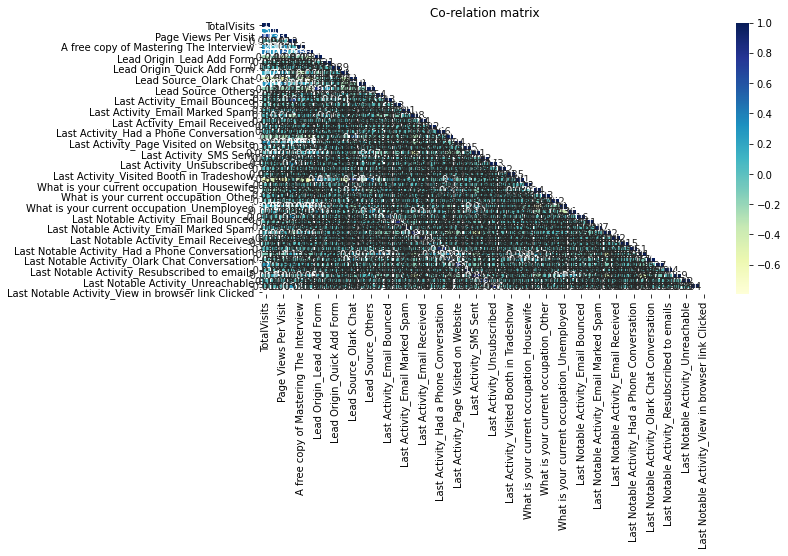

In [475]:
#looking at the co-relations
# plt.figure(figsize=(20,15))
# sns.heatmap(X_train.corr(),annot=True)
# plt.show()
corr_matrix(data=X_train.corr(),title='Co-relation matrix')

#### Analysis: unreadable matrix as the number of variables are high. Will drop variables after RFE

# RFE

In [476]:
from sklearn.linear_model import LogisticRegression

In [477]:
logreg=LogisticRegression()

In [478]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,17)
rfe=rfe.fit(X_train,y_train)

In [479]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Do Not Email', True, 1),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 10),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Marked Spam', False, 23),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Email Received', False, 27),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on

In [480]:
col=X_train.columns[rfe.support_]

In [481]:
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## Assessing the columns chosen in RFE

In [482]:
#Model 1
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.2
Date:                Sun, 07 Feb 2021   Deviance:                       5214.5
Time:                        20:36:07   Pearson chi2:                 7.05e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9860      0.060    -16.491      0.000      -1.103      -0.869
Total Time Spent on Website                              1.0970      0.040     27.401      0.000       1.019       1.175
Do Not Email                                            -1.0982      0.192     -5.709      0.000      -1.475      -0.721
Lead Origin_Lead Add Form                                3.6970      0.183     20.206      0.000       3.338       4.056
Lead Source_Olark Chat                                   1.2903      0.105     12.247      0.000       1.084       1.497
Last Activity_Converted to Lead                         -0.7280      0.230     -3.159      0.002      -1.180      -0.276
Last Activity_Email Bounced                             -1.0482      0.439     -2.385      0.017      -1.910      -0.187
Last Activity_Had a Phone Conversation                   0.9141      0.970      0.942      0.346      -0.987       2.815
Last Activity_Olark Chat Conversation                   -0.8718      0.174     -5.022      0.000      -1.212      -0.532
Last Activity_SMS Sent                                   1.1701      0.076     15.465      0.000       1.022       1.318
What is your current occupation_Housewife               22.7672   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
What is your current occupation_Not Specified           -1.0992      0.087    -12.566      0.000      -1.271      -0.928
What is your current occupation_Working Professional     2.5435      0.189     13.431      0.000       2.172       2.915
Last Notable Activity_Email Bounced                      1.0866      0.607      1.789      0.074      -0.104       2.277
Last Notable Activity_Had a Phone Conversation           2.5148      1.475      1.705      0.088      -0.376       5.406
Last Notable Activity_Modified                          -0.6606      0.087     -7.611      0.000      -0.831      -0.491
Last Notable Activity_Resubscribed to emails            24.3351   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_Unreachable                        1.8099      0.536      3.374      0.001       0.759       2.861
========================================================================================================================
"""

In [483]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [484]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Bounced,2.05
6,Last Activity_Had a Phone Conversation,2.03
13,Last Notable Activity_Had a Phone Conversation,2.01
14,Last Notable Activity_Modified,1.97
1,Do Not Email,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.63
10,What is your current occupation_Not Specified,1.43
8,Last Activity_SMS Sent,1.26
12,Last Notable Activity_Email Bounced,1.24


In [485]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.34
6795   0.27
3516   0.39
8105   0.84
3934   0.21
4844   0.99
3297   0.14
8071   0.99
987    0.06
7423   0.91
dtype: float64

In [486]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33853595, 0.27337785, 0.38794373, 0.84442757, 0.20908401,
       0.99170535, 0.14324308, 0.99463144, 0.05712898, 0.91399309])

#### Creating a dataframe with the actual converted and the predicted probabilities

In [487]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [488]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred':y_train_pred})
y_train_pred_final['Lead Number'] = elearning['Lead Number']
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number
0,0,0.34,660737
1,0,0.27,660728
2,0,0.39,660727
3,0,0.84,660719
4,0,0.21,660681


#### Creating new column 'predicted' with 1 if Converted_pred > 0.5 else 0

In [489]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.27,660728,0
2,0,0.39,660727,0
3,0,0.84,660719,1
4,0,0.21,660681,0


In [490]:
from sklearn import metrics

In [491]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3563  439]
 [ 746 1720]]


In [492]:
# Predicted     not_converted    converted
# Actual
# not_converted        3563      439
# cconverted           746       1720  

In [493]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8167903525046383


#### Accuracy is 81%. Moving forward with dropping columns having VIF>5

### Dropping What is your current occupation_Housewife column with high p-value

In [494]:
col=col.drop('What is your current occupation_Housewife')
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [495]:
#Re-running the model
#Model 2
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.8
Date:                Sun, 07 Feb 2021   Deviance:                       5227.6
Time:                        20:41:14   Pearson chi2:                 7.07e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9770      0.060    -16.383      0.000      -1.094      -0.860
Total Time Spent on Website                              1.0959      0.040     27.406      0.000       1.018       1.174
Do Not Email                                            -1.1024      0.192     -5.731      0.000      -1.479      -0.725
Lead Origin_Lead Add Form                                3.7060      0.183     20.285      0.000       3.348       4.064
Lead Source_Olark Chat                                   1.2844      0.105     12.204      0.000       1.078       1.491
Last Activity_Converted to Lead                         -0.7417      0.230     -3.221      0.001      -1.193      -0.290
Last Activity_Email Bounced                             -1.0600      0.440     -2.410      0.016      -1.922      -0.198
Last Activity_Had a Phone Conversation                   0.9001      0.970      0.928      0.354      -1.002       2.802
Last Activity_Olark Chat Conversation                   -0.8803      0.174     -5.074      0.000      -1.220      -0.540
Last Activity_SMS Sent                                   1.1618      0.076     15.373      0.000       1.014       1.310
What is your current occupation_Not Specified           -1.1043      0.087    -12.634      0.000      -1.276      -0.933
What is your current occupation_Working Professional     2.5365      0.189     13.398      0.000       2.165       2.908
Last Notable Activity_Email Bounced                      1.0952      0.608      1.802      0.071      -0.096       2.286
Last Notable Activity_Had a Phone Conversation           2.5207      1.475      1.709      0.088      -0.371       5.412
Last Notable Activity_Modified                          -0.6536      0.087     -7.549      0.000      -0.823      -0.484
Last Notable Activity_Resubscribed to emails            22.3362   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                        1.8035      0.536      3.362      0.001       0.752       2.855
========================================================================================================================
"""

In [496]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Bounced,2.05
6,Last Activity_Had a Phone Conversation,2.03
12,Last Notable Activity_Had a Phone Conversation,2.01
13,Last Notable Activity_Modified,1.97
1,Do Not Email,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.63
9,What is your current occupation_Not Specified,1.43
8,Last Activity_SMS Sent,1.26
11,Last Notable Activity_Email Bounced,1.24


In [497]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred':y_train_pred})
y_train_pred_final['Lead Number'] = elearning['Lead Number']
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number
0,0,0.34,660737
1,0,0.28,660728
2,0,0.39,660727
3,0,0.84,660719
4,0,0.21,660681


In [498]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.28,660728,0
2,0,0.39,660727,0
3,0,0.84,660719,1
4,0,0.21,660681,0


In [499]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3562  440]
 [ 747 1719]]
0.8164811379097093


### Dropping Last Notable Activity_Had a Phone Conversation Opened column with p-value>0.05

In [500]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [501]:
#Re-running the model
#Model 3
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.4
Date:                Sun, 07 Feb 2021   Deviance:                       5230.8
Time:                        20:42:12   Pearson chi2:                 8.17e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9737      0.060    -16.345      0.000      -1.090      -0.857
Total Time Spent on Website                              1.0940      0.040     27.382      0.000       1.016       1.172
Do Not Email                                            -1.1075      0.192     -5.764      0.000      -1.484      -0.731
Lead Origin_Lead Add Form                                3.7025      0.183     20.264      0.000       3.344       4.061
Lead Source_Olark Chat                                   1.2815      0.105     12.181      0.000       1.075       1.488
Last Activity_Converted to Lead                         -0.7344      0.230     -3.190      0.001      -1.186      -0.283
Last Activity_Email Bounced                             -1.0471      0.439     -2.383      0.017      -1.908      -0.186
Last Activity_Had a Phone Conversation                   2.2596      0.673      3.360      0.001       0.941       3.578
Last Activity_Olark Chat Conversation                   -0.8754      0.173     -5.047      0.000      -1.215      -0.535
Last Activity_SMS Sent                                   1.1614      0.076     15.370      0.000       1.013       1.309
What is your current occupation_Not Specified           -1.1039      0.087    -12.633      0.000      -1.275      -0.933
What is your current occupation_Working Professional     2.5333      0.189     13.377      0.000       2.162       2.904
Last Notable Activity_Email Bounced                      1.0858      0.607      1.788      0.074      -0.105       2.276
Last Notable Activity_Modified                          -0.6628      0.086     -7.666      0.000      -0.832      -0.493
Last Notable Activity_Resubscribed to emails            22.3336   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_Unreachable                        1.7999      0.536      3.355      0.001       0.749       2.851
========================================================================================================================
"""

In [502]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Bounced,2.05
12,Last Notable Activity_Modified,1.96
1,Do Not Email,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.63
9,What is your current occupation_Not Specified,1.43
8,Last Activity_SMS Sent,1.26
11,Last Notable Activity_Email Bounced,1.24
0,Total Time Spent on Website,1.23
4,Last Activity_Converted to Lead,1.23


In [503]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred':y_train_pred})
y_train_pred_final['Lead Number'] = elearning['Lead Number']
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number
0,0,0.34,660737
1,0,0.28,660728
2,0,0.39,660727
3,0,0.84,660719
4,0,0.21,660681


In [504]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.28,660728,0
2,0,0.39,660727,0
3,0,0.84,660719,1
4,0,0.21,660681,0


In [505]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3562  440]
 [ 747 1719]]
0.8164811379097093


### Droppping Last Notable Activity_Resubscribed to emails	 column due to high p-value

In [506]:
col=col.drop('Last Notable Activity_Resubscribed to emails')
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [507]:
#Re-running the model
#Model 4
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.3
Date:                Sun, 07 Feb 2021   Deviance:                       5234.7
Time:                        20:42:59   Pearson chi2:                 8.17e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9733      0.060    -16.342      0.000      -1.090      -0.857
Total Time Spent on Website                              1.0936      0.040     27.379      0.000       1.015       1.172
Do Not Email                                            -1.1077      0.192     -5.766      0.000      -1.484      -0.731
Lead Origin_Lead Add Form                                3.7031      0.183     20.267      0.000       3.345       4.061
Lead Source_Olark Chat                                   1.2864      0.105     12.236      0.000       1.080       1.492
Last Activity_Converted to Lead                         -0.7338      0.230     -3.188      0.001      -1.185      -0.283
Last Activity_Email Bounced                             -1.0471      0.439     -2.383      0.017      -1.908      -0.186
Last Activity_Had a Phone Conversation                   2.2588      0.673      3.359      0.001       0.941       3.577
Last Activity_Olark Chat Conversation                   -0.8797      0.173     -5.073      0.000      -1.220      -0.540
Last Activity_SMS Sent                                   1.1595      0.076     15.352      0.000       1.011       1.308
What is your current occupation_Not Specified           -1.0992      0.087    -12.596      0.000      -1.270      -0.928
What is your current occupation_Working Professional     2.5334      0.189     13.377      0.000       2.162       2.905
Last Notable Activity_Email Bounced                      1.0849      0.607      1.786      0.074      -0.106       2.275
Last Notable Activity_Modified                          -0.6643      0.086     -7.686      0.000      -0.834      -0.495
Last Notable Activity_Unreachable                        1.7969      0.536      3.351      0.001       0.746       2.848
========================================================================================================================
"""

In [508]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Bounced,2.05
12,Last Notable Activity_Modified,1.96
1,Do Not Email,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.63
9,What is your current occupation_Not Specified,1.42
8,Last Activity_SMS Sent,1.26
11,Last Notable Activity_Email Bounced,1.24
0,Total Time Spent on Website,1.23
4,Last Activity_Converted to Lead,1.23


In [509]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred':y_train_pred})
y_train_pred_final['Lead Number'] = elearning['Lead Number']
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number
0,0,0.34,660737
1,0,0.28,660728
2,0,0.39,660727
3,0,0.84,660719
4,0,0.21,660681


In [510]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.28,660728,0
2,0,0.39,660727,0
3,0,0.84,660719,1
4,0,0.21,660681,0


In [511]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3562  440]
 [ 748 1718]]
0.8163265306122449


### Dropping Last Notable Activity_Email Bounced due to high p-value

In [512]:
col=col.drop('Last Notable Activity_Email Bounced')
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [513]:
#Re-running the model
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.9
Date:                Sun, 07 Feb 2021   Deviance:                       5237.8
Time:                        20:44:57   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9677      0.059    -16.280      0.000      -1.084      -0.851
Total Time Spent on Website                              1.0935      0.040     27.377      0.000       1.015       1.172
Do Not Email                                            -1.0913      0.191     -5.707      0.000      -1.466      -0.716
Lead Origin_Lead Add Form                                3.6910      0.182     20.279      0.000       3.334       4.048
Lead Source_Olark Chat                                   1.2846      0.105     12.222      0.000       1.079       1.491
Last Activity_Converted to Lead                         -0.7184      0.230     -3.123      0.002      -1.169      -0.268
Last Activity_Email Bounced                             -0.6318      0.347     -1.820      0.069      -1.312       0.049
Last Activity_Had a Phone Conversation                   2.2600      0.672      3.362      0.001       0.943       3.577
Last Activity_Olark Chat Conversation                   -0.8687      0.173     -5.012      0.000      -1.208      -0.529
Last Activity_SMS Sent                                   1.1581      0.076     15.334      0.000       1.010       1.306
What is your current occupation_Not Specified           -1.1004      0.087    -12.615      0.000      -1.271      -0.929
What is your current occupation_Working Professional     2.5304      0.189     13.373      0.000       2.160       2.901
Last Notable Activity_Modified                          -0.6848      0.086     -7.983      0.000      -0.853      -0.517
Last Notable Activity_Unreachable                        1.7917      0.536      3.342      0.001       0.741       2.843
========================================================================================================================
"""

In [514]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.92
1,Do Not Email,1.82
5,Last Activity_Email Bounced,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.62
9,What is your current occupation_Not Specified,1.42
8,Last Activity_SMS Sent,1.26
0,Total Time Spent on Website,1.23
4,Last Activity_Converted to Lead,1.23
2,Lead Origin_Lead Add Form,1.21


In [515]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred':y_train_pred})
y_train_pred_final['Lead Number'] = elearning['Lead Number']
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number
0,0,0.34,660737
1,0,0.28,660728
2,0,0.39,660727
3,0,0.84,660719
4,0,0.21,660681


In [516]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.28,660728,0
2,0,0.39,660727,0
3,0,0.84,660719,1
4,0,0.21,660681,0


In [517]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3563  439]
 [ 749 1717]]
0.8163265306122449


### Dropping Last Activity_Email Bounced due to high p-value

In [518]:
col=col.drop('Last Activity_Email Bounced')
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [519]:
#Re-running the model
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.6
Date:                Sun, 07 Feb 2021   Deviance:                       5241.3
Time:                        20:45:21   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9713      0.059    -16.345      0.000      -1.088      -0.855
Total Time Spent on Website                              1.0910      0.040     27.346      0.000       1.013       1.169
Do Not Email                                            -1.2797      0.165     -7.740      0.000      -1.604      -0.956
Lead Origin_Lead Add Form                                3.6883      0.182     20.307      0.000       3.332       4.044
Lead Source_Olark Chat                                   1.2800      0.105     12.180      0.000       1.074       1.486
Last Activity_Converted to Lead                         -0.6964      0.230     -3.033      0.002      -1.146      -0.246
Last Activity_Had a Phone Conversation                   2.2834      0.676      3.378      0.001       0.959       3.608
Last Activity_Olark Chat Conversation                   -0.8491      0.173     -4.907      0.000      -1.188      -0.510
Last Activity_SMS Sent                                   1.1766      0.075     15.695      0.000       1.030       1.324
What is your current occupation_Not Specified           -1.0982      0.087    -12.589      0.000      -1.269      -0.927
What is your current occupation_Working Professional     2.5276      0.189     13.377      0.000       2.157       2.898
Last Notable Activity_Modified                          -0.7015      0.085     -8.224      0.000      -0.869      -0.534
Last Notable Activity_Unreachable                        1.7984      0.537      3.349      0.001       0.746       2.851
========================================================================================================================
"""

In [520]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.86
3,Lead Source_Olark Chat,1.65
6,Last Activity_Olark Chat Conversation,1.60
8,What is your current occupation_Not Specified,1.42
0,Total Time Spent on Website,1.23
7,Last Activity_SMS Sent,1.23
4,Last Activity_Converted to Lead,1.22
2,Lead Origin_Lead Add Form,1.21
9,What is your current occupation_Working Profes...,1.15
1,Do Not Email,1.12


In [521]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred':y_train_pred})
y_train_pred_final['Lead Number'] = elearning['Lead Number']
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number
0,0,0.34,660737
1,0,0.28,660728
2,0,0.39,660727
3,0,0.85,660719
4,0,0.20,660681


In [522]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.28,660728,0
2,0,0.39,660727,0
3,0,0.85,660719,1
4,0,0.20,660681,0


In [523]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3558  444]
 [ 749 1717]]
0.8155534941249227


### Our latest model have the following features:
 - <font color = blue>All variables have p-value less than 0.05. </font>
 - <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features.</font>
 - <font color = blue>The overall accuracy of `81.5%` at a probability threshold of 0.05 is also very acceptable.</font>
 
### So we need not drop any more variables and we can proceed with making predictions using this model only

### Assessing the model

In [524]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [525]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6962692619626926

In [526]:
# Let us calculate specificity
TN / float(TN+FP)

0.889055472263868

 ## Plotting the ROC Curve

In [527]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [528]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_pred, drop_intermediate = False )

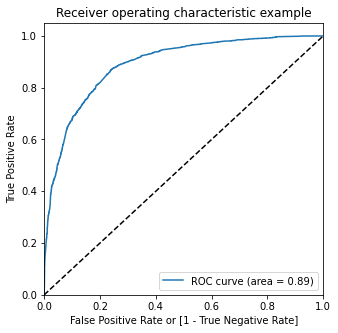

In [529]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

### Calculating the area under the curve(GINI)

In [530]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [531]:
auc = auc_val(fpr,tpr)
auc

0.8906273748770398

### Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [532]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.34,660737,0,1,1,1,1,0,0,0,0,0,0
1,0,0.28,660728,0,1,1,1,0,0,0,0,0,0,0
2,0,0.39,660727,0,1,1,1,1,0,0,0,0,0,0
3,0,0.85,660719,1,1,1,1,1,1,1,1,1,1,0
4,0,0.20,660681,0,1,1,1,0,0,0,0,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.639456  0.969992  0.435782
0.2   0.2  0.759740  0.915653  0.663668
0.3   0.3  0.801175  0.870641  0.758371
0.4   0.4  0.813080  0.768856  0.840330
0.5   0.5  0.815553  0.696269  0.889055
0.6   0.6  0.811843  0.636253  0.920040
0.7   0.7  0.785250  0.526358  0.944778
0.8   0.8  0.764842  0.435523  0.967766
0.9   0.9  0.717687  0.279805  0.987506


### Let's plot accuracy sensitivity and specificity for various probabilities.

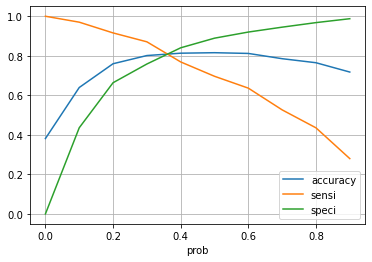

In [533]:

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

#### Analysis: from the above curve cutoff 0.35 seems optimal

In [534]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_pred.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.34,660737,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.28,660728,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.39,660727,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.85,660719,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.20,660681,0,1,1,1,0,0,0,0,0,0,0,0


In [535]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.809678416821274

In [536]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3235,  767],
       [ 464, 2002]], dtype=int64)

In [537]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [538]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8118410381184104

In [539]:
# Let us calculate specificity
TN / float(TN+FP)

0.8083458270864567

## Precision and Recall

In [540]:
from sklearn.metrics import precision_score, recall_score

##### Precision
TP / TP + FP

In [542]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7945395650161962

##### Recall
TP / TP + FN

In [543]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6962692619626926

### Precision and recall tradeoff

In [544]:
from sklearn.metrics import precision_recall_curve

In [545]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

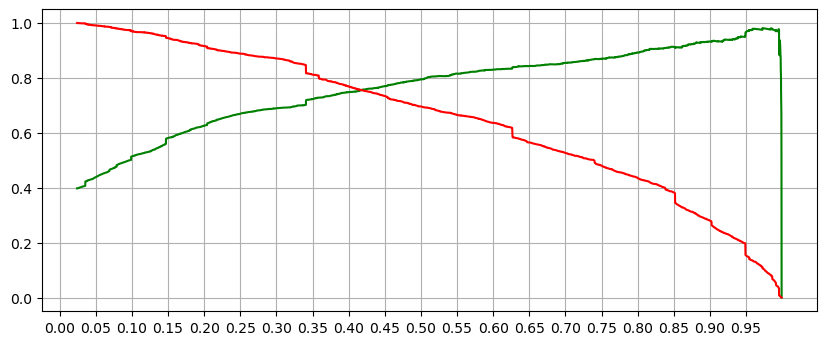

In [546]:
plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.grid()
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .42. However our business requirement here is to have Lead Conversion Rate around 80%.  

#### This is already achieved with our earlier threshold value of 0.35. So we will stick to this value.

### Calculating the F1 score
##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [547]:
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7421655500324182

## Making prediction on test data

In [548]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,1.43,0.97,2.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,-1.02,-0.89,-1.18,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0.51,-0.78,1.36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,-1.02,-0.89,-1.18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,-1.02,-0.89,-1.18,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [549]:
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [550]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0.97,0,0,0,0,0,0,1,1,0,0,0
2376,-0.89,0,1,0,0,0,0,1,0,0,0,0
7766,-0.78,0,0,0,0,0,0,0,0,1,0,1
9199,-0.89,0,0,1,0,0,1,0,0,0,1,0
4359,-0.89,0,1,0,0,0,0,0,0,0,0,0


In [551]:
#Adding the constant
X_test_sm = sm.add_constant(X_test)

In [552]:
#Making the predictions
y_test_pred = res.predict(X_test_sm)

In [553]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_pred':y_test_pred})
y_test_pred_final['Lead Number'] = elearning['Lead Number']
y_test_pred_final.head()

,Converted,Converted_pred,Lead Number
4269,1,0.54,619003
2376,1,0.95,636884
7766,1,0.92,590281
9199,0,0.10,579892
4359,1,0.85,617929


In [554]:
# Making prediction using cut off 0.35
y_test_pred_final['predicted'] = y_test_pred_final.Converted_pred.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Converted_pred,Lead Number,predicted
4269,1,0.54,619003,1
2376,1,0.95,636884,1
7766,1,0.92,590281,1
9199,0,0.10,579892,0
4359,1,0.85,617929,1


In [555]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.814935064935065

In [556]:
#confusion matrix
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
confusion_test

array([[1369,  308],
       [ 205,  890]], dtype=int64)

In [557]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [558]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8127853881278538

In [559]:
# Let us calculate specificity
TN / float(TN+FP)

0.8163387000596303

In [560]:
#precision score
precision_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.7429048414023373

In [561]:
#recall score
recall_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.8127853881278538

In [562]:
#F1 score
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7421655500324182

In [563]:
col

Index(['Total Time Spent on Website', 'Do Not Email',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

# The following are the final features for the model 
1. Total Time Spent on Website
2. Do Not Email
3. Lead Origin - Lead Add Form
4. Lead Source - Olark Chat
5. Last Activity
    - Converted to Lead
    - Had a Phone Conversation
    - Olark Chat Conversation
    - SMS Sent
6. What is your current occupation
    - Not Specified
    - Working Professional
7. Last Notable Activity
    - Modified
    - Unreachable

# Calculating Lead score for the entire dataset

### Lead Score = 100 * ConversionProbability

#### This needs to be calculated for all the leads from the original dataset (train + test)

In [564]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_test_pred_final.copy()
leads_test_pred.head()

,Converted,Converted_pred,Lead Number,predicted
4269,1,0.54,619003,1
2376,1,0.95,636884,1
7766,1,0.92,590281,1
9199,0,0.10,579892,0
4359,1,0.85,617929,1


In [565]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_pred,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.34,660737,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.28,660728,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.39,660727,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.85,660719,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.20,660681,0,1,1,1,0,0,0,0,0,0,0,0


In [568]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Converted', 'Converted_pred','Lead Number','final_predicted']]
leads_train_pred.rename(columns={'final_predicted': 'predicted'},inplace=True)
leads_train_pred.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.28,660728,0
2,0,0.39,660727,1
3,0,0.85,660719,1
4,0,0.20,660681,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [569]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Converted,Converted_pred,Lead Number,predicted
0,0,0.34,660737,0
1,0,0.28,660728,0
2,0,0.39,660727,1
3,0,0.85,660719,1
4,0,0.20,660681,0


In [570]:
#Shaoe of the entire dataset
lead_full_pred.shape

(9240, 4)

In [571]:
# Ensuring the Lead Number are unique for each lead in the final dataframe
lead_full_pred=lead_full_pred.join(elearning)
len(lead_full_pred['Lead Number'].unique().tolist())

7302

In [577]:
#work in progress

# Determining feature importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [572]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             1.09
Do Not Email                                           -1.28
Lead Origin_Lead Add Form                               3.69
Lead Source_Olark Chat                                  1.28
Last Activity_Converted to Lead                        -0.70
Last Activity_Had a Phone Conversation                  2.28
Last Activity_Olark Chat Conversation                  -0.85
Last Activity_SMS Sent                                  1.18
What is your current occupation_Not Specified          -1.10
What is your current occupation_Working Professional    2.53
Last Notable Activity_Modified                         -0.70
Last Notable Activity_Unreachable                       1.80
dtype: float64

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [573]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             29.58
Do Not Email                                           -34.70
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  34.70
Last Activity_Converted to Lead                        -18.88
Last Activity_Had a Phone Conversation                  61.91
Last Activity_Olark Chat Conversation                  -23.02
Last Activity_SMS Sent                                  31.90
What is your current occupation_Not Specified          -29.78
What is your current occupation_Working Professional    68.53
Last Notable Activity_Modified                         -19.02
Last Notable Activity_Unreachable                       48.76
dtype: float64

#### Sorting the feature variables based on their relative coefficient values

In [574]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                              1
Do Not Email                                             8
Lead Origin_Lead Add Form                                6
Lead Source_Olark Chat                                  10
Last Activity_Converted to Lead                          4
Last Activity_Had a Phone Conversation                   0
Last Activity_Olark Chat Conversation                    7
Last Activity_SMS Sent                                   3
What is your current occupation_Not Specified           11
What is your current occupation_Working Professional     5
Last Notable Activity_Modified                           9
Last Notable Activity_Unreachable                        2
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

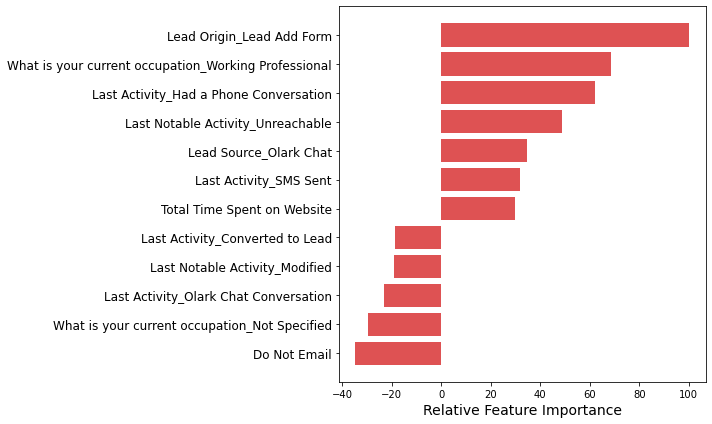

In [575]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [576]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
2,Lead Origin_Lead Add Form,100.00
9,What is your current occupation_Working Profes...,68.53
5,Last Activity_Had a Phone Conversation,61.91
